In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import joblib

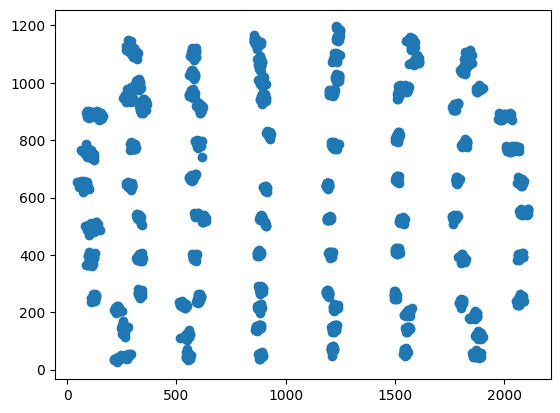

In [2]:
training_data = np.load('training_data.npy', allow_pickle=True)
training_labels = np.load('training_labels.npy', allow_pickle=True)
training_labels = np.array([(lambda p: (p.x(), p.y()))(p) for p in training_labels])

plt.plot(training_data[:, 0], training_data[:, 1], 'o', label='Training Input')

In [5]:
predictor = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=True)),
    ('linear', LinearRegression())
])

predictor.fit(training_data, training_labels)
y_predicted = predictor.predict(training_data)

error = np.mean(np.linalg.norm(y_predicted - training_labels, axis=0))
print(error)
joblib.dump(predictor, 'predictor.pkl')

913.3775201072775


['predictor.pkl']

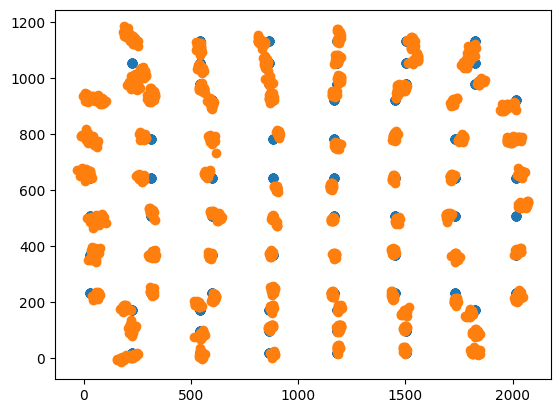

In [6]:
plt.plot(training_labels[:, 0], training_labels[:, 1], 'o', label='ground truth')
plt.plot(y_predicted[:, 0], y_predicted[:, 1], 'o', label='predicted')

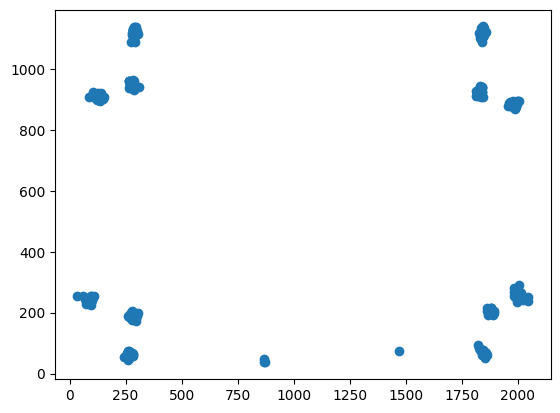

In [24]:
poly_features.shape

(321, 5)